In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "dataset path"

In [ ]:
!ls

archive.zip  model.pkl	my_model  pest


In [ ]:
#!unzip archive.zip

In [ ]:
!ls

archive.zip  pest


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
i = plt.imread("pest/train/aphids/jpg_0 - Copy (2).jpg")

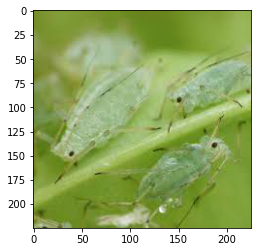

In [ ]:
plt.imshow(i)

In [ ]:
i.shape

(225, 225, 3)

Data Preprocessing

In [ ]:
import cv2

In [ ]:
image = cv2.resize(i,(225,225))

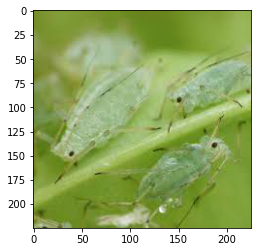

In [ ]:
plt.imshow(image)

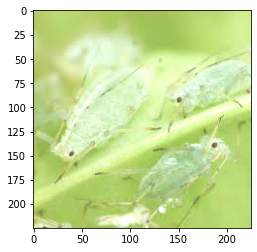

In [ ]:
import numpy as np
intensity_matrix = np.ones(image.shape,dtype='uint8')*60
bright_image = cv2.add(image,intensity_matrix)
plt.imshow(bright_image)

In [ ]:
image_array = np.asarray(bright_image)
print(image_array.shape)
print(type(image_array))

(225, 225, 3)
<class 'numpy.ndarray'>


In [ ]:
image_array = np.true_divide(image_array,255)

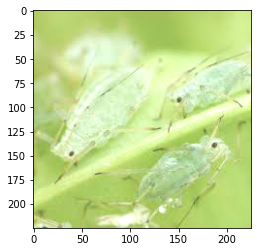

In [ ]:
plt.imshow(image_array)

In [ ]:
def preprocess(image):
  image = cv2.resize(image,(225,225))
  intensity_matrix = np.ones(image.shape,dtype='uint8')*60
  image = np.asarray(image,np.uint8)
  bright_image = cv2.add(image,intensity_matrix)
  image_array = np.asarray(bright_image)
  image_array = np.true_divide(image_array,255)
  return image_array

Loading Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,preprocessing_function=preprocess,validation_split=0.05)

In [ ]:
train = datagen.flow_from_directory('pest/train',target_size=(225,225),batch_size=16,seed=10,class_mode='categorical',subset="training")

Found 2565 images belonging to 9 classes.


In [ ]:
val = datagen.flow_from_directory('pest/train',target_size=(225,225),batch_size=16,seed=10,class_mode='categorical',subset="validation")

Found 135 images belonging to 9 classes.


In [ ]:
datagen2 = ImageDataGenerator(preprocessing_function=preprocess)
test = datagen2.flow_from_directory('pest/test',target_size=(225,225),batch_size=8,seed=10,class_mode='categorical')

Found 450 images belonging to 9 classes.


In [ ]:
batch = next(train)

Deep Learning Model

In [ ]:
from keras.layers import Input, BatchNormalization, Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(Input(shape=(225,225,3)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(9,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 225, 225, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optim = RMSprop(learning_rate=0.001)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [ ]:
history = model.fit(train,epochs=50,validation_data=val)

Epoch 1/50
161/161 [==============================] - 513s 3s/step - loss: 14.3480 - accuracy: 0.2261 - val_loss: 5.7828 - val_accuracy: 0.1333
Epoch 2/50
161/161 [==============================] - 21s 133ms/step - loss: 9.1434 - accuracy: 0.3575 - val_loss: 10.1300 - val_accuracy: 0.0963
Epoch 3/50
161/161 [==============================] - 21s 130ms/step - loss: 6.4888 - accuracy: 0.4277 - val_loss: 5.7142 - val_accuracy: 0.2741
Epoch 4/50
161/161 [==============================] - 21s 129ms/step - loss: 2.5293 - accuracy: 0.5314 - val_loss: 2.8650 - val_accuracy: 0.4370
Epoch 5/50
161/161 [==============================] - 21s 131ms/step - loss: 1.5286 - accuracy: 0.5996 - val_loss: 4.7516 - val_accuracy: 0.2963
Epoch 6/50
161/161 [==============================] - 21s 132ms/step - loss: 1.0605 - accuracy: 0.6982 - val_loss: 3.2279 - val_accuracy: 0.4889
Epoch 7/50
161/161 [==============================] - 21s 130ms/step - loss: 0.7880 - accuracy: 0.7657 - val_loss: 2.9773 - val_ac

In [ ]:
model.evaluate(test)

57/57 [==============================] - 5s 86ms/step - loss: 1.8221 - accuracy: 0.9089


[1.8221418857574463, 0.9088888764381409]

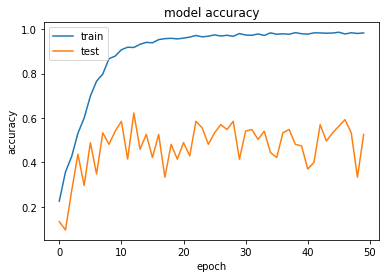

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

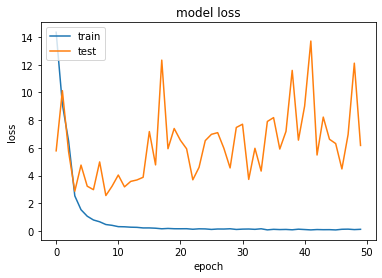

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
import pickle
model_w = pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://752cc477-00a3-4bd8-83b1-51af5cd497b4/assets
